In [ ]:
import pandas as pd   #Installing necessary Libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Global_temp.csv')

In [ ]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [ ]:
df.shape

(10000, 9)

In [ ]:
df.tail()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255
9999,2022-12-31 00:00:00.000000000,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539


In [ ]:
# Group the DataFrame by 'Country' and perform aggregation (e.g., mean, sum, count) as needed
country_wise_data = df.groupby('Country')

# Example: Calculate the average temperature for each country
average_temp_by_country = country_wise_data['Temperature'].mean()

# Example: Count the number of records for each country
record_count_by_country = country_wise_data.size()

# Print or use the aggregated data
print(average_temp_by_country)
print(record_count_by_country)


Country
Afghanistan          14.730345
Albania              15.646637
Algeria              14.496989
American Samoa       15.895872
Andorra              15.074974
                       ...    
Wallis and Futuna    14.827670
Western Sahara       15.386609
Yemen                15.140053
Zambia               14.706316
Zimbabwe             15.000557
Name: Temperature, Length: 243, dtype: float64
Country
Afghanistan          38
Albania              42
Algeria              43
American Samoa       44
Andorra              46
                     ..
Wallis and Futuna    37
Western Sahara       40
Yemen                34
Zambia               40
Zimbabwe             35
Length: 243, dtype: int64


In [ ]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [ ]:
df.info()  #Getting info about the data

# I personally like to see Dates initially as an object or String type and then convert it coz it is easy to understand by eyes.
# Coz there can a problem eg: 10.09.24 and 09.10.24 here which is the day? so to avoid this...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [ ]:
df.isnull().sum()  #Checking for null values

,0
Date,0
Location,0
Country,0
Temperature,0
CO2 Emissions,0
Sea Level Rise,0
Precipitation,0
Humidity,0
Wind Speed,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # to convert into date time objs. This is imp to Perform time-based analysis.
df["Date"]

,Date
0,2000-01-01 00:00:00.000000000
1,2000-01-01 20:09:43.258325832
2,2000-01-02 16:19:26.516651665
3,2000-01-03 12:29:09.774977497
4,2000-01-04 08:38:53.033303330
...,...
9995,2022-12-27 15:21:06.966696576
9996,2022-12-28 11:30:50.225022464
9997,2022-12-29 07:40:33.483348224
9998,2022-12-30 03:50:16.741674112


In [ ]:
df['Temperature'] = df['Temperature'].astype(int)  #converted Temp into a whole val as it is never displayed in point values.
df['Temperature']

,Temperature
0,10
1,13
2,27
3,12
4,13
...,...
9995,15
9996,16
9997,22
9998,19


In [ ]:
df.describe()

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2011-07-02 00:00:00,14.438500,400.220469,-0.003152,49.881208,49.771302,25.082066
min,2000-01-01 00:00:00,-3.000000,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,2005-10-01 00:00:00,11.000000,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,2011-07-02 00:00:00,14.000000,400.821324,0.002332,49.818967,49.678412,24.910787
75%,2017-04-01 00:00:00,18.000000,433.307905,0.675723,74.524991,75.206390,37.670260
max,2022-12-31 00:00:00,33.000000,582.899701,4.116559,99.991900,99.959665,49.997664
std,NaN,5.039242,49.696933,0.991349,28.862417,28.929320,14.466648


The Precipitation and Humidity has similar Standard deviation.

**Now our we got the insights and our data is clean for EDA**

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'CO2 Emissions'}>],
       [<Axes: title={'center': 'Sea Level Rise'}>, <Axes: >]],
      dtype=object)

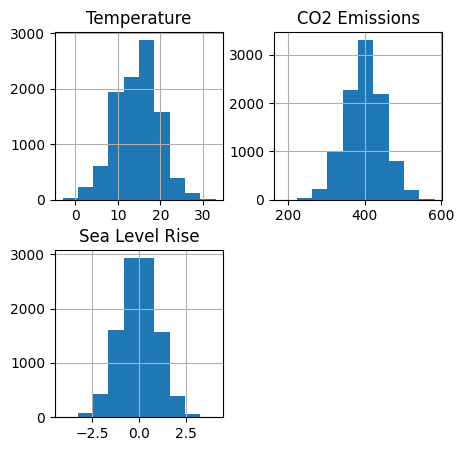

In [ ]:
df[[ 'Temperature', 'CO2 Emissions',
       'Sea Level Rise']].hist(figsize=(5,5))

This histogram of "Temperature" on x-axis shows the temp range and on the y-axis the count of occurrences of that particular temperature.

These Histograms are similar to Normal Distributions

<Axes: xlabel='Temperature', ylabel='CO2 Emissions'>

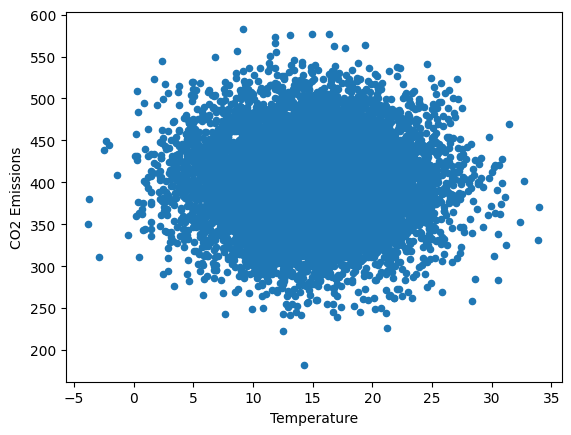

In [ ]:
df.plot(kind="scatter", x="Temperature", y="CO2 Emissions")
# This cloud scatterplot shows ther is no clear linear relation btw both. and futher these scatters can be used to perform PCA (Which i am still learning)

<Axes: ylabel='Density'>

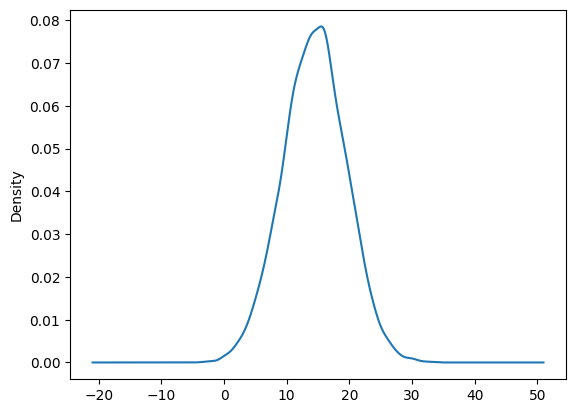

In [ ]:
df["Temperature"].plot(kind="kde") # used for probability density

<Axes: ylabel='Density'>

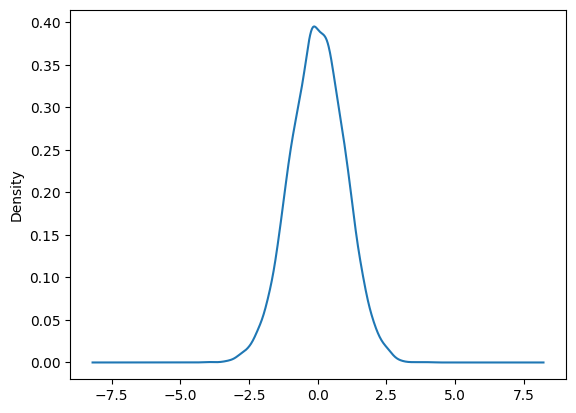

In [ ]:
df["Sea Level Rise"].plot(kind="kde")

<Axes: ylabel='Density'>

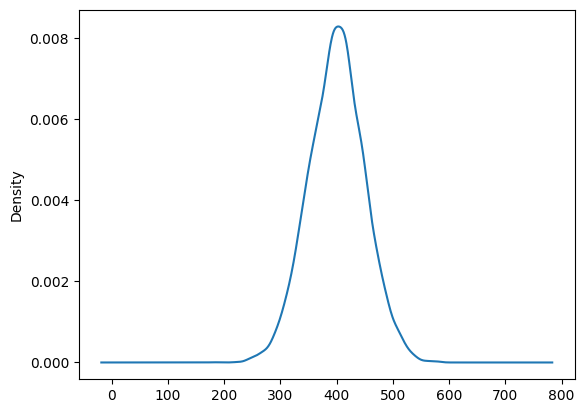

In [ ]:
df["CO2 Emissions"].plot(kind="kde")

In [ ]:
df["CO2 Emissions"].skew() # If the number is near to 0 then it is perfect

-0.025255568718952195

In [ ]:
df["Temperature"].skew()

-0.010714049129221671

In [ ]:
df["Sea Level Rise"].skew()

-0.05372882113617919

<Axes: >

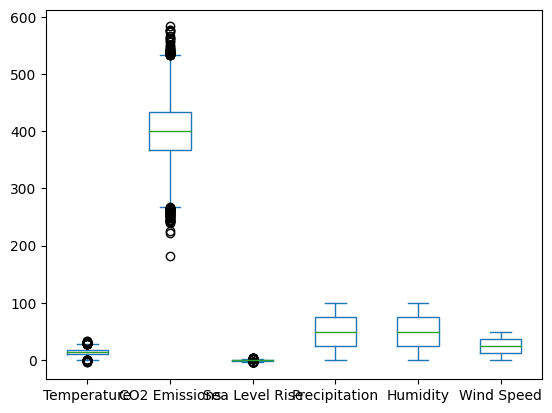

In [ ]:
df[['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].plot(kind='box') # To check for outliers

<Axes: >

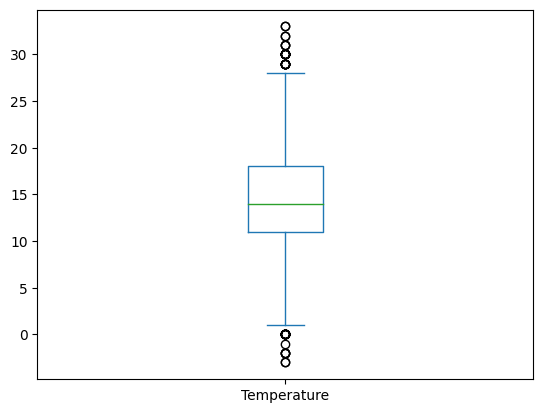

In [ ]:
df["Temperature"].plot(kind="box")

<Axes: >

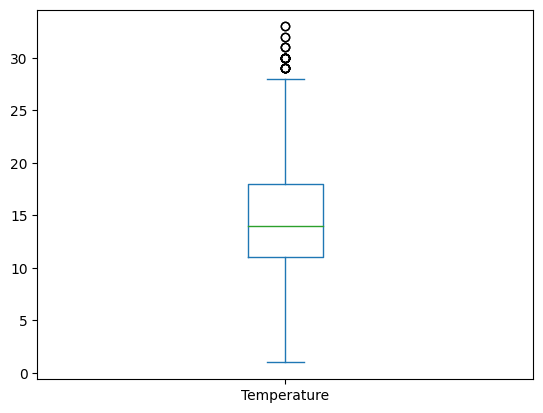

In [ ]:
df = df[df['Temperature'] >= 1]
df['Temperature'].plot(kind="box") # Removed temp below 0

<Axes: >

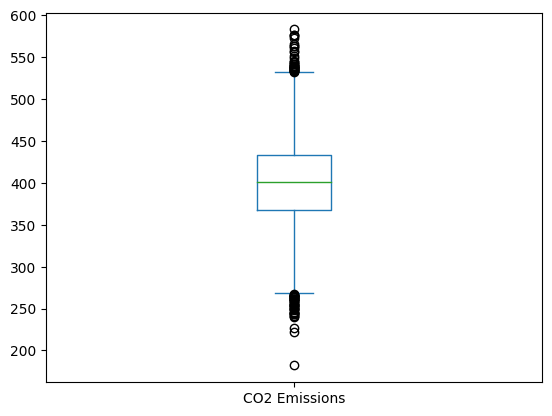

In [ ]:
df["CO2 Emissions"].plot(kind="box")

<Axes: >

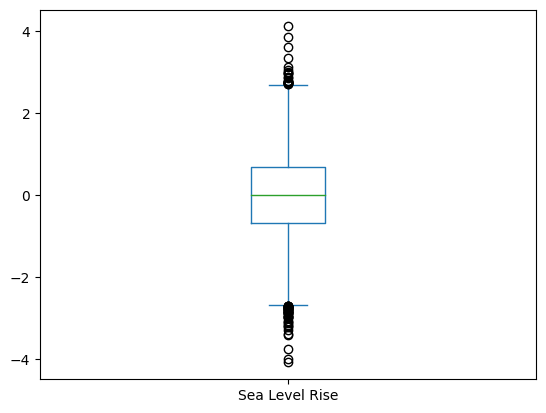

In [ ]:
df["Sea Level Rise"].plot(kind="box")

<Axes: >

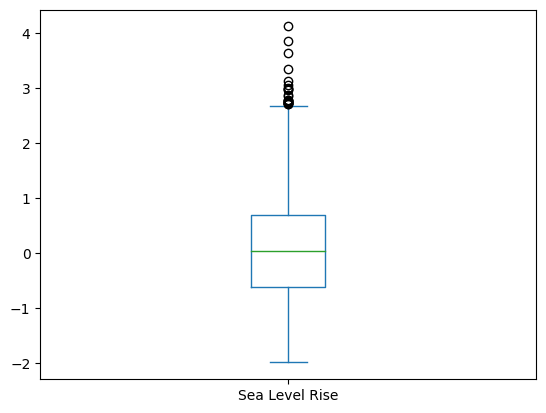

In [ ]:
df = df[df["Sea Level Rise"]>=-2]
df["Sea Level Rise"].plot(kind="box")

<Axes: >

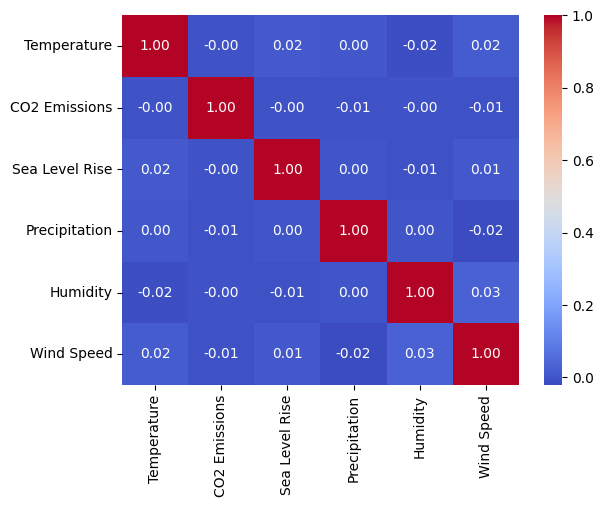

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")


**+Ve correlation**

There is a weak +ve correlation btw humidity and wind speed.

There is a weak +ve correlation btw sea level rise and temp.

**-Ve Correlation**

There is weak -ve correlation btw temp and humidity (which means as temp increase the humidity tends to slighty decrease)

*The dataset has no significant correlation btw the variables *italicized text* *

In [ ]:
average_temp_by_country = country_wise_data['Temperature'].mean()
print(average_temp_by_country)

Country
Afghanistan          14.730345
Albania              15.646637
Algeria              14.496989
American Samoa       15.895872
Andorra              15.074974
                       ...    
Wallis and Futuna    14.827670
Western Sahara       15.386609
Yemen                15.140053
Zambia               14.706316
Zimbabwe             15.000557
Name: Temperature, Length: 243, dtype: float64


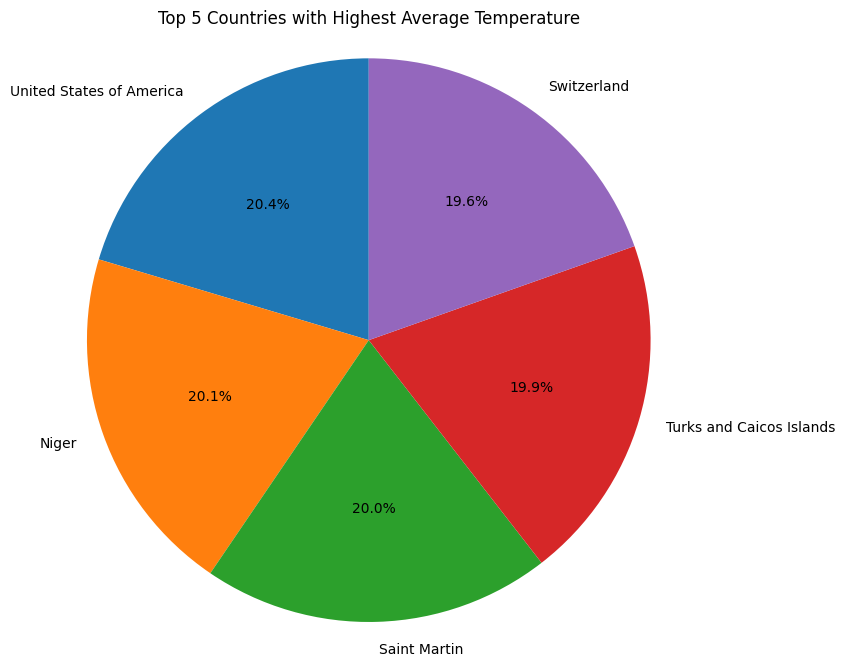

In [ ]:
# prompt: create a pie chart of top 5 Country of highest tempreture

# Group by country and calculate the average temperature
country_temp = df.groupby('Country')['Temperature'].mean()

# Sort the countries by average temperature in descending order
top_5_countries = country_temp.sort_values(ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries with Highest Average Temperature')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


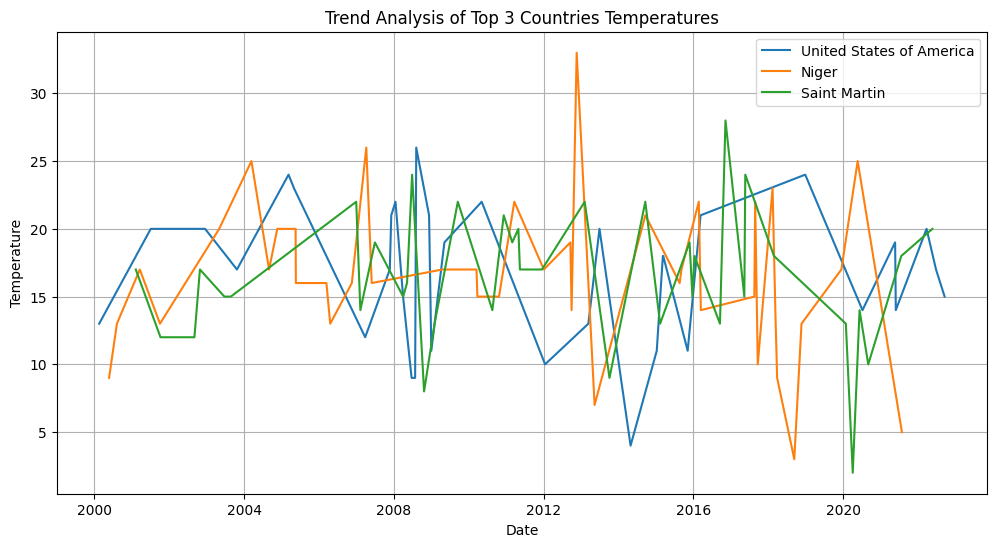

In [ ]:
top_3_countries = country_temp.nlargest(3)
plt.figure(figsize=(12, 6))
for country in top_3_countries.index:
  temp_country = df[df['Country'] == country]
  plt.plot(temp_country['Date'], temp_country['Temperature'], label=country)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Trend Analysis of Top 3 Countries Temperatures')
plt.legend()
plt.grid(True)
plt.show()


The dataset has a more or less constant temperature throughout the years about avg of 20 degrees. (This can be because the values are recorded incorrectly or hypothetical ) this can lead to poor model performance.

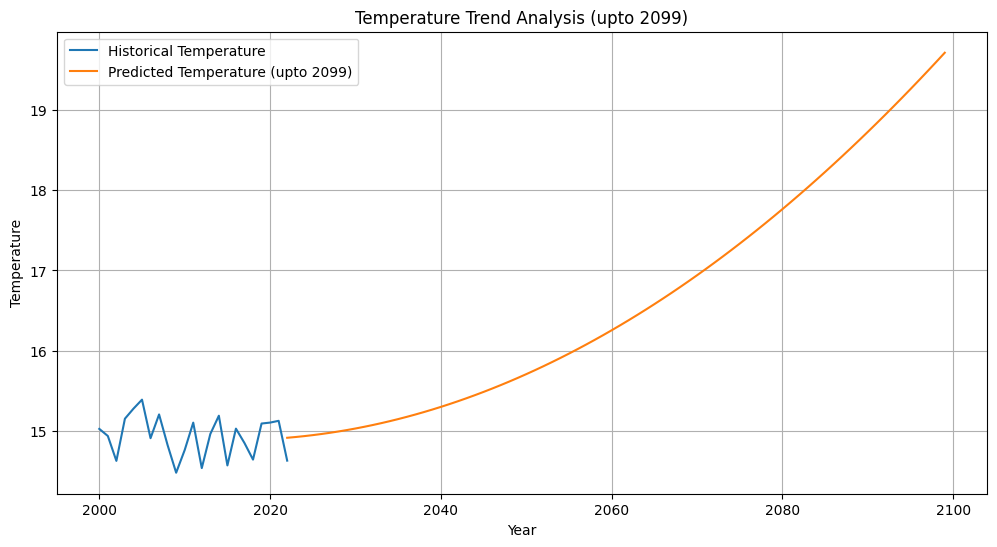

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df_temp = df[['Date', 'Temperature']].copy()
df_temp['Year'] = df_temp['Date'].dt.year # We take only relevent feature i.e year from date column

future_years = pd.date_range(start='2022-01-01', end='2099-12-31', freq='YS') # We set the frequency as yearly
future_df = pd.DataFrame({'Date': future_years})
future_df['Year'] = future_df['Date'].dt.year

# Select the data for the existing years and sort by year
df_train = df_temp.groupby('Year')['Temperature'].mean().reset_index()
df_train = df_train.sort_values('Year')


X_train = df_train['Year'].values.reshape(-1, 1) # data prep
y_train = df_train['Temperature'].values

poly_reg = PolynomialFeatures(degree=2) # Create a polynomial regression model of degree 2
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression() # training the model
lin_reg_2.fit(X_poly, y_train)

# Prepare the future data for prediction
X_future = future_df['Year'].values.reshape(-1, 1)
X_future_poly = poly_reg.transform(X_future)

# Predict the future temperatures
y_future = lin_reg_2.predict(X_future_poly)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_train['Year'], df_train['Temperature'], label='Historical Temperature')
plt.plot(future_df['Year'], y_future, label='Predicted Temperature (upto 2099)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trend Analysis (upto 2099)')
plt.legend()
plt.grid(True)
plt.show()

NN Model

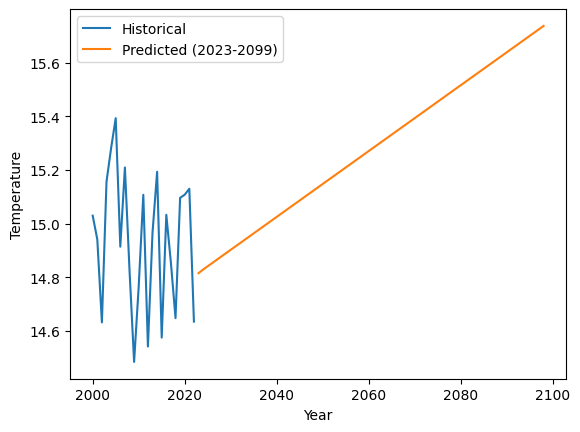

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.read_csv('Global_temp.csv')


df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year  # From Date we take years
df_train = df.groupby('Year')['Temperature'].mean().reset_index() #temperature data is grouped by year, and the average temperature for each year is calculated

# Prepare data for training
X = df_train['Year'].values.reshape(-1, 1) #Reshape ensures that both X and y are in the proper 2D format, required for model training.
y = df_train['Temperature'].values.reshape(-1, 1)

scaler_x = MinMaxScaler() # scale the data between 0 and 1 and normalizing
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


X_train, y_train = torch.tensor(X_train).float(), torch.tensor(y_train).float() # Convert data to PyTorch tensors
X_test, y_test = torch.tensor(X_test).float(), torch.tensor(y_test).float()

# Define a simple neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.fc(x)

model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss() #loss function tells how well the model's predictions match the true data.

# Train the model
for epoch in range(1000):
    optimizer.zero_grad() # To reset the gradients or they may give incorrect results
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

future_years = pd.DataFrame({'Year': range(2023, 2099)})
X_future = scaler_x.transform(future_years.values)
X_future = torch.tensor(X_future).float()
y_future = model(X_future).detach().numpy()
y_future = scaler_y.inverse_transform(y_future)

# Plot historical and future predictions
plt.plot(df_train['Year'], df_train['Temperature'], label='Historical')
plt.plot(future_years['Year'], y_future, label='Predicted (2023-2099)') # Updated label
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

**Conclusion**

Based on the dataset the model is able to predict the tempreature upto year 2099.

There are no strong corelation between each feature columns.

The main componet of the dataset i.e Tempreature does not show a gradual rise btw 2000-2021 due to possible reasons such as incorrect data entry or hypothetical values leading to a non realistic results.
